In [1]:
#Project: Boston and Seattle AirBnB data

In [2]:
#Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

In [4]:
#Import datasets for Seattle and Boston 

In [5]:
st_listings = pd.read_csv('Seattle/seattle_listings.csv')
st_calender = pd.read_csv('Seattle/seattle_calendar.csv')
st_reviews = pd.read_csv('Seattle/seattle_reviews.csv')
bst_listings = pd.read_csv('Boston/boston_listings.csv')
bst_calender = pd.read_csv('Boston/boston_calendar.csv')
bst_reviews = pd.read_csv('Boston/boston_reviews.csv')

#### Make copies of all the data sets for data cleaning

In [206]:
st_listings_copy = st_listings.copy()
st_calender_copy = st_calender.copy()
st_reviews_copy = st_reviews.copy()
bst_listings_copy = bst_listings.copy()
bst_calender_copy = bst_calender.copy()
bst_reviews_copy = bst_reviews.copy()

In [12]:
#st_listings[['space','review_scores_value','host_total_listings_count','host_is_superhost','neighbourhood_group_cleansed','city','state','country','property_type','room_type','bathrooms', 'bedrooms', 'beds', 'bed_type']]



In [60]:
st_calender_copy.head(15)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [61]:
st_calender_copy.shape

(1393570, 4)

In [62]:
st_reviews_copy.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [64]:
st_listings_copy.columns[st_listings_copy.isnull().mean() > 0.75]

Index(['square_feet', 'license'], dtype='object')

In [65]:
st_listings_copy.shape #Seattle listing dataframe has 3818 rows and 92 columns


(3818, 92)

#### columns with no missing values 

In [66]:
st_listings_copy.columns[st_listings.isnull().mean() == 0]

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'experiences_offered', 'picture_url', 'host_id', 'host_url',
       'host_verifications', 'street', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'room_type', 'accommodates', 'bed_type',
       'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'requires_license', 'jurisdiction_names',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count'],
      dtype='object')

In [27]:
#What cities have the Highest rates for an apartment in Seattle 

In [28]:
#What Cities have the Highest Rates for an apartment in Boston

In [29]:
#What are the most common apartment types for both Seattle and Boston

In [30]:
#What months have the most earnings for seattle and boston
#Average Earnings between a Super Host and a normal Host

In [31]:
#What factors most influence the prices of AirBnB IN Seattle and Boston

In [32]:
#What factors influence the ratings the mostin Both Locations 

In [67]:
st_listings_copy.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [68]:
st_listings_copy[['review_scores_value','host_is_superhost','neighbourhood_group_cleansed','price', 'weekly_price', 'monthly_price','city','state','country','property_type','room_type', 'bedrooms', 'beds', 'bed_type']]['price'].isnull().sum()


0

In [69]:
st_calender_copy.tail(40)

,listing_id,date,available,price
1393530,10208623,2016-11-24,f,NaN
1393531,10208623,2016-11-25,f,NaN
1393532,10208623,2016-11-26,f,NaN
1393533,10208623,2016-11-27,f,NaN
1393534,10208623,2016-11-28,f,NaN
1393535,10208623,2016-11-29,f,NaN
1393536,10208623,2016-11-30,f,NaN
1393537,10208623,2016-12-01,f,NaN
1393538,10208623,2016-12-02,f,NaN
1393539,10208623,2016-12-03,f,NaN


In [55]:
#st_reviews.head()

In [38]:
#for cities with the highest prices , we can use the price in listings

In [70]:
st_calender_copy.listing_id.value_counts()

241032      365
9299824     365
8597687     365
2309250     365
7420339     365
           ... 
4243163     365
4569115     365
4464824     365
9258513     365
10208623    365
Name: listing_id, Length: 3818, dtype: int64

In [ ]:
#What are the 5 most common property types for both Seattle and Boston

In [42]:
type_count = st_listings['property_type'].value_counts()

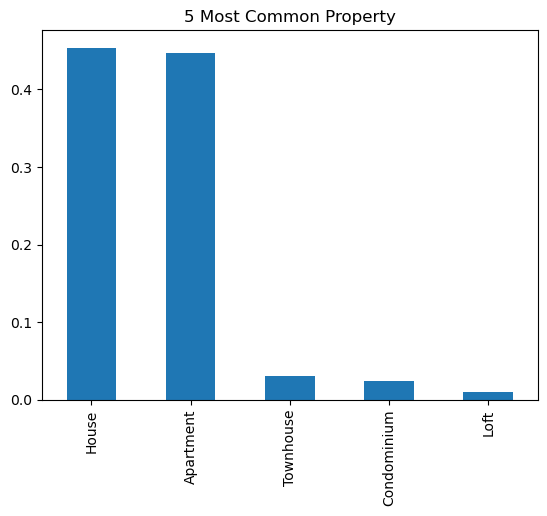

In [45]:
plt.figure(figsize=[15,5])
(type_count[:5]/st_listings.shape[0]).plot(kind="bar");
plt.title("5 Most Common Property in Seattle");

In [46]:
type_count_st = bst_listings_copy['property_type'].value_counts()

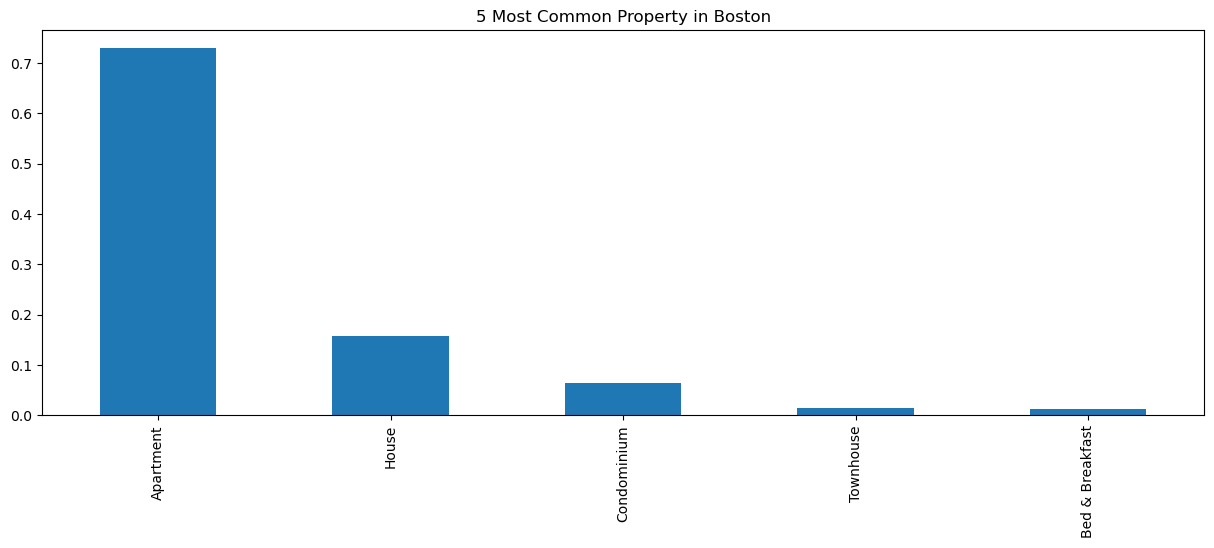

In [71]:
plt.figure(figsize=[15,5])
(type_count_st[:5]/bst_listings_copy.shape[0]).plot(kind="bar");
plt.title("5 Most Common Property in Boston");

#### 5 Most expensive Neighbourhood groups  in seattle and boston

In [56]:
st_listings_copy.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [72]:
st_listings_copy[['street', 'neighbourhood', 'neighbourhood_cleansed','neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',]]
       

,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market
0,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle
1,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle
2,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle
3,"8th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle
4,"14th Ave W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle
...,...,...,...,...,...,...,...,...
3813,"Northwest 48th Street, Seattle, WA 98107, Unit...",Fremont,Fremont,Other neighborhoods,Seattle,WA,98107,Seattle
3814,"Fuhrman Avenue East, Seattle, WA 98102, United...",Portage Bay,Portage Bay,Capitol Hill,Seattle,WA,98102,Seattle
3815,"South Laurel Street, Seattle, WA 98178, United...",NaN,Rainier Beach,Rainier Valley,Seattle,WA,98178,Seattle
3816,"43rd Avenue East, Seattle, WA 98112, United St...",NaN,Madison Park,Capitol Hill,Seattle,WA,98112,Seattle


In [154]:
#st_listings_copy['price'] = [x[:-3] for x in st_listings_copy["price"]]

In [195]:
st_listings_copy['price'] = [x.strip('$') for x in st_listings_copy["price"]]

In [197]:
st_listings_copy['price'] = [x.replace(',','') for x in st_listings_copy["price"]]

In [199]:
st_listings_copy[st_listings_copy['price']== '1000.00']

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3122,4825073,https://www.airbnb.com/rooms/4825073,20160104002432,2016-01-04,Cute Basement Apartment,2 bedroom fully finished basement apartment wi...,NaN,2 bedroom fully finished basement apartment wi...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,flexible,f,f,1,0.08


In [210]:
st_listings_copy['price'].head()

0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64

In [200]:
st_listings_copy['price'] = st_listings_copy['price'].astype(float)

In [202]:
area_rate = st_listings_copy.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values(ascending=False)

In [203]:
area_rate

neighbourhood_group_cleansed
Magnolia               177.672131
Queen Anne             157.223729
Downtown               154.405660
West Seattle           141.359606
Cascade                140.101124
Capitol Hill           130.592593
Central Area           128.338753
Ballard                124.682609
Other neighborhoods    119.968514
Interbay               109.727273
Seward Park            108.477273
Beacon Hill             94.669492
University District     93.639344
Lake City               92.671642
Rainier Valley          91.899371
Northgate               88.550000
Delridge                83.278481
Name: price, dtype: float64

#### FUNCTION TO CLEAN PRICE FOR BOTH CITIES

In [212]:


def clean_price(city):
    city['price'] = [x.strip('$') for x in city["price"]]
    city['price'] = [x.replace(',','') for x in city["price"]]
    city['price'] = city['price'].astype(float)
    return city['price']

In [208]:
cities = [st_listings_copy,bst_listings_copy]

for city in cities:
    clean_price(city)

In [ ]:
area_rate = st_listings_copy.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values(ascending=False)